In [1]:
import pandas as pd
import numpy as np
import warnings
import os

In [2]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
# from sklearn.metrics import RocCurveDisplay, auc, roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
import plotly.express as px
from category_encoders import OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, PoissonRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

In [4]:
data = pd.read_csv('Cleaned_NB_Profile_Crime_data-Sheet1.csv')

In [5]:
# Define function that returns the largest integer in a coloumn 
# Idea, input is a pandas dataframe only containing the coloumn values you want to compare, output is a copy of it in binary 


In [6]:
data_ML = data
data_ML = data_ML.drop(columns=['Neighbourhood.Name'])
corr_matrix = data_ML.corr()

mask_con_corr = corr_matrix [(corr_matrix  >= 0.25) | (corr_matrix <= -0.25)]
# Summary statistics
data_ML.describe()

,Neighbourhood_Number,Gini_i_HH_tIncome,Avg_HH_size,Avg_tIncome_HH_in_2020,Race_Total,Prop_Black,Prop_Arab,Prop_Latin_Amrican,Prop_East_SouthEast_Asian,Prop_West_Asian,...,Total Population,Unemployment_rate,Prop_no_dip,Prop_HS_or_equi,Prop_PS_non_Bach,Prop_PS_Bach,Prop_Graduate,TOTAL_CRIME_RATE_2015,TOTAL_CRIME_RATE_2016,TOTAL_CRIME_RATE_2017
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,...,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,88.107595,0.375316,2.458861,125263.924051,17476.550633,0.093333,0.014014,0.034310,0.196253,0.023455,...,15050.189873,13.915823,0.143910,0.233251,0.211823,0.257247,0.153768,1306.566676,1329.622746,1337.456692
std,51.236381,0.089362,0.419300,59930.842541,6131.673250,0.075838,0.012118,0.025989,0.116336,0.028004,...,5378.313610,2.785095,0.070302,0.053932,0.042951,0.080217,0.075244,932.469620,923.283525,1033.714003
min,1.000000,0.200000,1.500000,72200.000000,6260.000000,0.006776,0.002294,0.003735,0.066064,0.001597,...,5225.000000,7.500000,0.016973,0.104703,0.102041,0.089848,0.026731,471.544560,403.878540,439.033421
25%,43.250000,0.300000,2.200000,93150.000000,12452.500000,0.041337,0.006695,0.015544,0.117772,0.007332,...,10803.750000,11.925000,0.085716,0.190163,0.177685,0.203326,0.093918,836.431076,801.390477,815.701050
50%,88.500000,0.400000,2.500000,105800.000000,16812.500000,0.067819,0.010460,0.026378,0.159881,0.013700,...,14457.500000,13.700000,0.139752,0.237465,0.220438,0.256928,0.143393,1079.474772,1124.989210,1073.337510
75%,133.750000,0.400000,2.700000,131150.000000,22216.250000,0.120328,0.016745,0.042595,0.229275,0.025515,...,18887.500000,16.075000,0.188287,0.279848,0.246344,0.320347,0.213656,1486.905432,1546.082075,1484.528885
max,174.000000,0.700000,3.800000,519500.000000,33300.000000,0.379015,0.069392,0.129165,0.703294,0.161616,...,29010.000000,21.100000,0.335129,0.339574,0.289720,0.489571,0.339469,8146.022700,7391.077900,8655.023850


In [7]:
#data['Prop_Black'] = data.Prop_Black*data.Race_Total
#data['Prop_Arab'] = data.Prop_Arab*data.Race_Total
#data['Prop_Latin_Amrican'] = data.Prop_Latin_Amrican*data.Race_Total
#data['Prop_East_SouthEast_Asian'] = data.Prop_East_SouthEast_Asian*data.Race_Total
#data['Prop_West_Asian'] = data.Prop_West_Asian*data.Race_Total
#data['Prop_multi_vis_minority'] = data.Prop_multi_vis_minority*data.Race_Total
#data['Prop_non_vis_minority'] = data.Prop_non_vis_minority*data.Race_Total

#data['Prop_no_dip'] = data.Prop_no_dip*data.Race_Total
#data['Prop_HS_or_equi'] = data.Prop_HS_or_equi*data.Race_Total
#data['Prop_PS_non_Bach'] = data.Prop_PS_non_Bach*data.Race_Total
#data['Prop_PS_Bach'] = data.Prop_PS_Bach*data.Race_Total
#data['Prop_Graduate'] = data.Prop_Graduate*data.Race_Total

<Axes: >

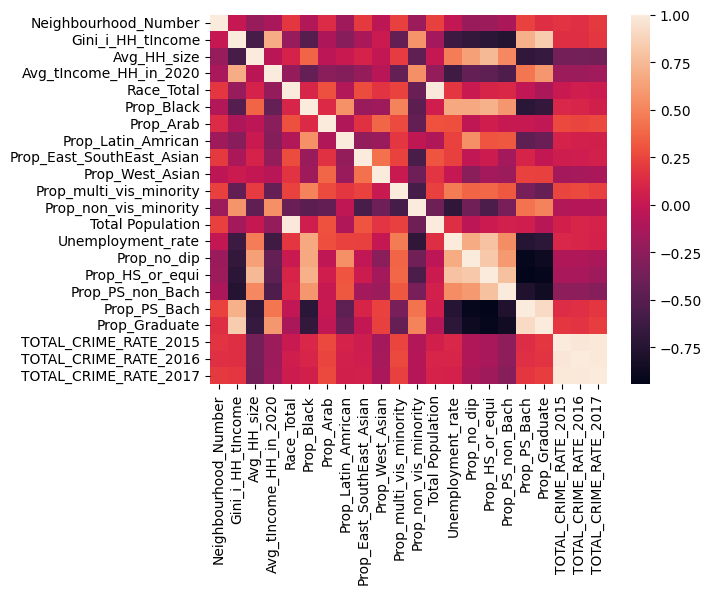

In [8]:
#sns.heatmap(mask_con_corr, corr_matrix, annot=True, fmt=".2f")
sns.heatmap(corr_matrix, annot=False, fmt=".2f")

In [9]:
### Build the multivariate regression model ###
# Set the feature and labels
y = data['TOTAL_CRIME_RATE_2016']
y_2017 = data['TOTAL_CRIME_RATE_2017']
X_multi = data[['Gini_i_HH_tIncome', 'Avg_HH_size',
       'Avg_tIncome_HH_in_2020', 'Race_Total', 'Prop_Black', 'Prop_Arab',
       'Prop_Latin_Amrican', 'Prop_East_SouthEast_Asian', 'Prop_West_Asian',
       'Prop_multi_vis_minority', 'Prop_non_vis_minority', 'Unemployment_rate',
       'Prop_no_dip', 'Prop_HS_or_equi', 'Prop_PS_non_Bach', 'Prop_PS_Bach',
       'Prop_Graduate']]

In [10]:
X_multi

,Gini_i_HH_tIncome,Avg_HH_size,Avg_tIncome_HH_in_2020,Race_Total,Prop_Black,Prop_Arab,Prop_Latin_Amrican,Prop_East_SouthEast_Asian,Prop_West_Asian,Prop_multi_vis_minority,Prop_non_vis_minority,Unemployment_rate,Prop_no_dip,Prop_HS_or_equi,Prop_PS_non_Bach,Prop_PS_Bach,Prop_Graduate
0,0.3,3.1,104500,33300,0.183934,0.013814,0.048048,0.098498,0.012462,0.028078,0.158108,14.3,0.182931,0.291379,0.264138,0.182759,0.078793
1,0.3,3.2,86200,31345,0.265274,0.063327,0.043069,0.072739,0.058542,0.027756,0.107513,17.7,0.277919,0.303060,0.213798,0.132918,0.072306
2,0.3,3.0,101300,9850,0.161421,0.029442,0.065482,0.070051,0.037563,0.024365,0.319797,16.6,0.222355,0.283921,0.255828,0.159594,0.078302
3,0.3,2.6,90000,10375,0.180241,0.006265,0.069880,0.104578,0.021205,0.024578,0.423614,13.9,0.212379,0.308915,0.263487,0.161272,0.053947
4,0.3,2.9,94600,9355,0.302512,0.016034,0.095136,0.143773,0.014965,0.026189,0.308926,18.5,0.226598,0.339574,0.263396,0.115558,0.054874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.5,1.7,99800,12645,0.045077,0.056544,0.028470,0.355081,0.021748,0.027284,0.284698,13.3,0.026969,0.152825,0.103168,0.377568,0.339469
154,0.3,2.3,103700,23180,0.075712,0.009060,0.048318,0.148188,0.005177,0.027179,0.620362,14.0,0.197961,0.212634,0.208903,0.240736,0.139766
155,0.4,2.3,111500,12380,0.043619,0.006058,0.035945,0.156300,0.003231,0.022617,0.685380,13.8,0.187642,0.207633,0.179918,0.263517,0.161290
156,0.4,1.7,85400,15885,0.064526,0.013850,0.066100,0.176896,0.062952,0.023292,0.486623,13.0,0.054583,0.146241,0.204600,0.363199,0.231377


In [11]:
# Splitting the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# training data set (111)
train = pd.concat([X_train_multi, y_train_multi], axis=1)

# testing data set (47)
test = pd.concat([X_test_multi, y_test_multi], axis=1)

# testing data set for 2017, same neighbourhood features, different crime results(158)
test_2017 = data[['TOTAL_CRIME_RATE_2017','Gini_i_HH_tIncome', 'Avg_HH_size',
       'Avg_tIncome_HH_in_2020', 'Race_Total', 'Prop_Black', 'Prop_Arab',
       'Prop_Latin_Amrican', 'Prop_East_SouthEast_Asian', 'Prop_West_Asian',
       'Prop_multi_vis_minority', 'Prop_non_vis_minority', 'Unemployment_rate',
       'Prop_no_dip', 'Prop_HS_or_equi', 'Prop_PS_non_Bach', 'Prop_PS_Bach',
       'Prop_Graduate']]

# Create and fit the model
mlr_model = LinearRegression()
#mlr_model = PoissonRegressor()

mlr_model.fit(X_train_multi, y_train_multi)

#this is cross-validation, should I use bootstrapping instead? (probably)

# Predictions
y_pred_multi = mlr_model.predict(X_test_multi)

y_pred_train_multi = mlr_model.predict(X_train_multi)

y_pred_test_2017 = mlr_model.predict(X_multi)

# Evaluating the model
print(f'Mean Squared Error (MLR): {mean_squared_error(y_test_multi, y_pred_multi)}')

print(f'R2 Score Test (MLR): {r2_score(y_train_multi, y_pred_train_multi)}')
print(f'R2 Score Train (MLR): {r2_score(y_test_multi, y_pred_multi)}')
print(f'R2 Score 2017 (MLR):{r2_score(y,y_pred_test_2017)}')


Mean Squared Error (MLR): 339281.1592377367
R2 Score Test (MLR): 0.47766589465792686
R2 Score Train (MLR): 0.33101911670321793
R2 Score 2017 (MLR):0.45988570842917964


In [12]:
# Obtain coefficients 
coefficients = mlr_model.coef_
intercept = mlr_model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept) 


Coefficients: [-3.44045409e+02 -7.37266701e+02 -4.15592867e-03 -5.32422372e-03
  7.22602909e+02  1.21712751e+04  4.73534925e+03 -7.02430762e+02
 -1.44214709e+04  2.94603284e+04 -1.28898296e+03 -3.95172434e+01
  2.03158487e+11  2.03158497e+11  2.03158478e+11  2.03158489e+11
  2.03158494e+11]
Intercept: -203158484677.1112


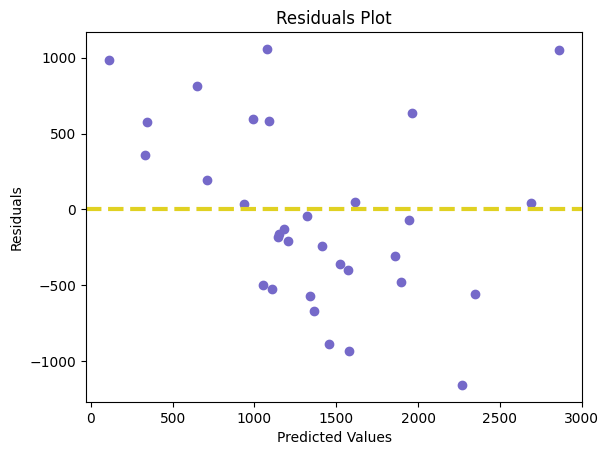

In [13]:
# Residual plotting
residuals = y_test_multi - y_pred_multi
plt.scatter(y_pred_multi, residuals, color='#7569c9')
plt.axhline(y=0, linestyle='--', color='#e0d122', lw=3)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

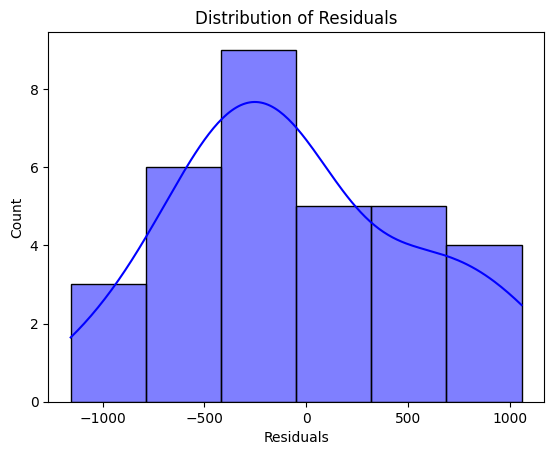

In [14]:
sns.histplot(residuals, kde=True, color='blue')

# Set the x-axis label
plt.xlabel('Residuals')

# Set the plot title
plt.title('Distribution of Residuals')

# Display the plot
plt.show()

In [15]:
####### END OF ANALYSIS #######

In [16]:
### Now we will add the predicted crime data and actual crime data from 2016 to a GEOjson file 
# this file contains the border and outline of each of the 158 neighbourhoods in Toronto 
# we will then upload this file to ArcGIS to display the distribution of the model-predicted vs actual crime data 

In [17]:
data['Predicted_Total_Crime_2016'] = list(mlr_model.predict(X_multi))
data['Residual_Crime_Difference'] = data['TOTAL_CRIME_RATE_2016'].sub(data['Predicted_Total_Crime_2016'])

In [18]:
import json

with open('neighbourhood-crime-rates.geojson', 'r') as f:
    data_geo = json.load(f)

#A Python dictionary containing properties to be added to each GeoJSON Feature
#properties_dict={
#    "property1": "foo",
#    "property2": 10,
#    "property3": 100
#    }
#Convert the dictionary to a list
#properties_list=zip(properties_dict.keys(),properties_dict.values())

#Loop over GeoJSON features and add the new properties
#for feat in data_geo['features']:
#    for i in range(len(mlr_model.predict(X_multi))):
#        feat ['properties']['predicted_crime_2016']= mlr_model.predict(X_multi)[i]

feature_number=0
for feat in data_geo['features']:
    feat ['properties']['predicted_crime_2016']= mlr_model.predict(X_multi)[feature_number]
    feat ['properties']['actual_crime_2016']= data['TOTAL_CRIME_RATE_2016'][feature_number]
    feat ['properties']['difference_in_crime_2016']= data['Residual_Crime_Difference'][feature_number]
    feature_number+=1
        
#Write result to a new file
with open('NBCR_New.geojson', 'w') as f:
    json.dump(data_geo, f)

In [19]:
############################################################################################

In [20]:
# Random Forest Classifier

In [21]:
############################################################################################

In [22]:
import pandas as pd
import numpy as np
import warnings
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
# from sklearn.metrics import RocCurveDisplay, auc, roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
import plotly.express as px
from category_encoders import OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error



warnings.filterwarnings('ignore')

In [23]:
data.head()

,Neighbourhood.Name,Neighbourhood_Number,Gini_i_HH_tIncome,Avg_HH_size,Avg_tIncome_HH_in_2020,Race_Total,Prop_Black,Prop_Arab,Prop_Latin_Amrican,Prop_East_SouthEast_Asian,...,Prop_no_dip,Prop_HS_or_equi,Prop_PS_non_Bach,Prop_PS_Bach,Prop_Graduate,TOTAL_CRIME_RATE_2015,TOTAL_CRIME_RATE_2016,TOTAL_CRIME_RATE_2017,Predicted_Total_Crime_2016,Residual_Crime_Difference
0,West.Humber.Clairville,1,0.3,3.1,104500,33300,0.183934,0.013814,0.048048,0.098498,...,0.182931,0.291379,0.264138,0.182759,0.078793,2370.142330,2656.74044,2510.11449,1280.345703,1376.394737
1,Mount.Olive.Silverstone.Jamestown,2,0.3,3.2,86200,31345,0.265274,0.063327,0.043069,0.072739,...,0.277919,0.303060,0.213798,0.132918,0.072306,1353.239820,1315.85332,1298.16828,1611.308197,-295.454877
2,Thistletown.Beaumond.Heights,3,0.3,3.0,101300,9850,0.161421,0.029442,0.065482,0.070051,...,0.222355,0.283921,0.255828,0.159594,0.078302,1145.904880,1114.01038,1040.45023,950.757935,163.252445
3,Rexdale.Kipling,4,0.3,2.6,90000,10375,0.180241,0.006265,0.069880,0.104578,...,0.212379,0.308915,0.263487,0.161272,0.053947,955.919422,1341.70158,1400.56490,1253.240997,88.460583
4,Elms.Old.Rexdale,5,0.3,2.9,94600,9355,0.302512,0.016034,0.095136,0.143773,...,0.226598,0.339574,0.263396,0.115558,0.054874,1214.061020,1267.48530,1127.52821,1668.994568,-401.509268


In [24]:
#y = data['TOTAL_CRIME_RATE_2016']
#X_multi = data[['Gini_i_HH_tIncome', 'Avg_HH_size',
#       'Avg_tIncome_HH_in_2020', 'Race_Total', 'Prop_Black', 'Prop_Arab',
#       'Prop_Latin_Amrican', 'Prop_East_SouthEast_Asian', 'Prop_West_Asian',
#       'Prop_multi_vis_minority', 'Prop_non_vis_minority', 'Unemployment_rate',
#       'Prop_no_dip', 'Prop_HS_or_equi', 'Prop_PS_non_Bach', 'Prop_PS_Bach',
#       'Prop_Graduate']]
data = data[['TOTAL_CRIME_RATE_2016','Gini_i_HH_tIncome', 'Avg_HH_size',
       'Avg_tIncome_HH_in_2020', 'Race_Total', 'Prop_Black', 'Prop_Arab',
       'Prop_Latin_Amrican', 'Prop_East_SouthEast_Asian', 'Prop_West_Asian',
       'Prop_multi_vis_minority', 'Prop_non_vis_minority', 'Unemployment_rate',
       'Prop_no_dip', 'Prop_HS_or_equi', 'Prop_PS_non_Bach', 'Prop_PS_Bach',
       'Prop_Graduate']]


numerical_columns = ['Gini_i_HH_tIncome', 'Avg_HH_size',
       'Avg_tIncome_HH_in_2020', 'Race_Total', 'Prop_Black', 'Prop_Arab',
       'Prop_Latin_Amrican', 'Prop_East_SouthEast_Asian', 'Prop_West_Asian',
       'Prop_multi_vis_minority', 'Prop_non_vis_minority', 'Unemployment_rate',
       'Prop_no_dip', 'Prop_HS_or_equi', 'Prop_PS_non_Bach', 'Prop_PS_Bach',
       'Prop_Graduate']
categorical_columns = []

target_coloumn = 'TOTAL_CRIME_RATE_2016'

In [25]:
# check if data is missing for some values
data.isnull().sum(axis=0)

TOTAL_CRIME_RATE_2016        0
Gini_i_HH_tIncome            0
Avg_HH_size                  0
Avg_tIncome_HH_in_2020       0
Race_Total                   0
Prop_Black                   0
Prop_Arab                    0
Prop_Latin_Amrican           0
Prop_East_SouthEast_Asian    0
Prop_West_Asian              0
Prop_multi_vis_minority      0
Prop_non_vis_minority        0
Unemployment_rate            0
Prop_no_dip                  0
Prop_HS_or_equi              0
Prop_PS_non_Bach             0
Prop_PS_Bach                 0
Prop_Graduate                0
dtype: int64

In [26]:
# Create a simple decision tree model 
# Build simple decision tree model

# Splitting the data_F into 70% training and 30% testing
#train = data.sample(frac=0.7, random_state=10)
#test = data.drop(train.index) 

# Initializing a column transformer that will handle categorical data4 encoding
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(),[c for c in categorical_columns])],
    remainder='passthrough'
)


# Initializing a Decision Tree Regressor (different from the "Decision tree classifier")
dt = tree.DecisionTreeRegressor(criterion='squared_error')
# Criterion here is Mean Square Error, because we are interested in the reduction of variance within each split. 
# Could potentionally use the "poisson" aswell
# dt = tree.DecisionTreeRegressor(criterion='poisson')



# Initializing a decision tree regressor ()

# Creating a pipeline that first preprocesses the data_F and then applies the decision tree
model = Pipeline([
    ('pre_process', ct),
    ('DT', dt)
])
# Training the model on the training data_F
model = model.fit(train.drop('TOTAL_CRIME_RATE_2016', axis=1), train['TOTAL_CRIME_RATE_2016'])

# Predicting and evaluating the model's performance on the training data
Y_pred = model.predict(train.drop('TOTAL_CRIME_RATE_2016', axis=1))
r2_score(train['TOTAL_CRIME_RATE_2016'], Y_pred)

1.0

In [27]:
Y_pred = model.predict(test.drop('TOTAL_CRIME_RATE_2016', axis=1))
r2_score(test['TOTAL_CRIME_RATE_2016'], Y_pred)

-0.8806039716973502

In [28]:
Y_pred_2017 = model.predict(test_2017.drop('TOTAL_CRIME_RATE_2017', axis=1))
r2_score(Y_pred_2017, test_2017['TOTAL_CRIME_RATE_2017'])

0.7286245346366849

In [29]:
param_dist = {
    "DT__max_depth" : [5,10,15,20],
    "DT__min_samples_leaf" : [10,15,20],
    "DT__splitter" : ['best', 'random'],
    "DT__max_features" : ['sqrt', 'log2']
}



#param_dist = {
#    "DT__max_depth" : [10],
#    "DT__min_samples_leaf" : [10,15,20],
#    "DT__splitter" : ['best', 'random'],
#    "DT__max_features" : ['sqrt', 'log2']
#}

# Setting up Stratified K-Fold cross-validation
#skf = StratifiedKFold(n_splits=5)

# Initialize Grid Search with the model and the hyperparameters to search
grid_search = GridSearchCV(
    model, param_grid=param_dist, cv=5, scoring='neg_mean_squared_error'
)
# Estimator needs to be 'square error', can potentially change this to 'Poisson', check later

In [30]:
# Train Grid Search on the training data`
grid_search.fit(train.drop('TOTAL_CRIME_RATE_2016', axis=1), train['TOTAL_CRIME_RATE_2016'])

# Extract results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Display the set of parameters that achieved the best score
results[results['rank_test_score'] == 1]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_DT__max_depth,param_DT__max_features,param_DT__min_samples_leaf,param_DT__splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.00103,0.000082,0.000609,0.000078,5,sqrt,15,best,"{'DT__max_depth': 5, 'DT__max_features': 'sqrt...",-626611.647153,-2.010881e+06,-815428.922216,-407229.656395,-224393.373873,-816908.913683,629395.943289,1


In [31]:
grid_search.best_params_

{'DT__max_depth': 5,
 'DT__max_features': 'sqrt',
 'DT__min_samples_leaf': 15,
 'DT__splitter': 'best'}

In [53]:
### Rerun with best parameters
# Updating the model's parameters with the best ones found from GridSearchCV
model  = model.set_params(**grid_search.best_params_)

# Retraining the model with the best parameters on the training dataset
model  = model.fit(train.drop('TOTAL_CRIME_RATE_2016', axis=1), train['TOTAL_CRIME_RATE_2016'])

# Predicting on the training dataset and computing the accuracy
Y_pred = model.predict(train.drop('TOTAL_CRIME_RATE_2016', axis=1))
r2_score(train['TOTAL_CRIME_RATE_2016'], Y_pred)

0.12981862893119045

In [68]:
# Create a simple decision tree model 
# Build simple decision tree model

# Splitting the data_F into 70% training and 30% testing
#train = data.sample(frac=0.7, random_state=10)
#test = data.drop(train.index) 

# Initializing a column transformer that will handle categorical data4 encoding
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(),[c for c in categorical_columns])],
    remainder='passthrough'
)


# Initializing a Decision Tree Regressor (different from the "Decision tree classifier")
dt = tree.DecisionTreeRegressor(criterion='squared_error')
# Criterion here is Mean Square Error, because we are interested in the reduction of variance within each split. 
# Could potentionally use the "poisson" aswell
# dt = tree.DecisionTreeRegressor(criterion='poisson')



# Initializing a decision tree regressor ()

# Creating a pipeline that first preprocesses the data_F and then applies the decision tree
model_a = Pipeline([
    ('pre_process', ct),
    ('DT', dt)
])
# Training the model on the training data_F
model_a = model_a.fit(data.drop('TOTAL_CRIME_RATE_2016',axis=1), data['TOTAL_CRIME_RATE_2016'])

# Predicting and evaluating the model's performance on the training data
Y_pred = model_a.predict(data.drop('TOTAL_CRIME_RATE_2016', axis=1))
r2_score(data['TOTAL_CRIME_RATE_2016'], Y_pred)

1.0

In [69]:
Y_pred = model_a.predict(test_2017.drop('TOTAL_CRIME_RATE_2017', axis=1))
r2_score(test_2017['TOTAL_CRIME_RATE_2017'], Y_pred)

0.9496924594603333

In [70]:
param_dist = {
    "DT__max_depth" : [5,10,15,20],
    "DT__min_samples_leaf" : [10,15,20],
    "DT__splitter" : ['best', 'random'],
    "DT__max_features" : ['sqrt', 'log2']
}



#param_dist = {
#    "DT__max_depth" : [10],
#    "DT__min_samples_leaf" : [10,15,20],
#    "DT__splitter" : ['best', 'random'],
#    "DT__max_features" : ['sqrt', 'log2']
#}

# Setting up Stratified K-Fold cross-validation
#skf = StratifiedKFold(n_splits=5)

# Initialize Grid Search with the model and the hyperparameters to search
grid_search = GridSearchCV(
    model_a, param_grid=param_dist, cv=5, scoring='neg_mean_squared_error'
)
# Estimator needs to be 'square error', can potentially change this to 'Poisson', check later

In [71]:
# Train Grid Search on the training data`
grid_search.fit(train.drop('TOTAL_CRIME_RATE_2016', axis=1), train['TOTAL_CRIME_RATE_2016'])

# Extract results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Display the set of parameters that achieved the best score
results[results['rank_test_score'] == 1]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_DT__max_depth,param_DT__max_features,param_DT__min_samples_leaf,param_DT__splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,0.000775,0.000012,0.000655,0.00039,10,sqrt,15,best,"{'DT__max_depth': 10, 'DT__max_features': 'sqr...",-606009.301329,-2.029862e+06,-1.101224e+06,-241519.549667,-426564.271909,-881035.953232,641786.655076,1


In [72]:
grid_search.best_params_

{'DT__max_depth': 10,
 'DT__max_features': 'sqrt',
 'DT__min_samples_leaf': 15,
 'DT__splitter': 'best'}

In [83]:
### Rerun with best parameters
# Updating the model's parameters with the best ones found from GridSearchCV
model  = model.set_params(**grid_search.best_params_)

# Retraining the model with the best parameters on the training dataset
model  = model.fit(train.drop('TOTAL_CRIME_RATE_2016', axis=1), train['TOTAL_CRIME_RATE_2016'])

# Predicting on the training dataset and computing the accuracy
Y_pred = model.predict(train.drop('TOTAL_CRIME_RATE_2016', axis=1))
r2_score(train['TOTAL_CRIME_RATE_2016'], Y_pred)

0.22478544219690721

In [81]:
# Predicting on the test dataset and computing the accuracy
Y_pred = model.predict(test.drop('TOTAL_CRIME_RATE_2016', axis=1))
r2_score(test['TOTAL_CRIME_RATE_2016'], Y_pred)

0.35016238681306633

In [79]:
Y_pred = model.predict(test_2017.drop('TOTAL_CRIME_RATE_2017', axis=1))
r2_score(test_2017['TOTAL_CRIME_RATE_2017'], Y_pred)

0.26583400320757666

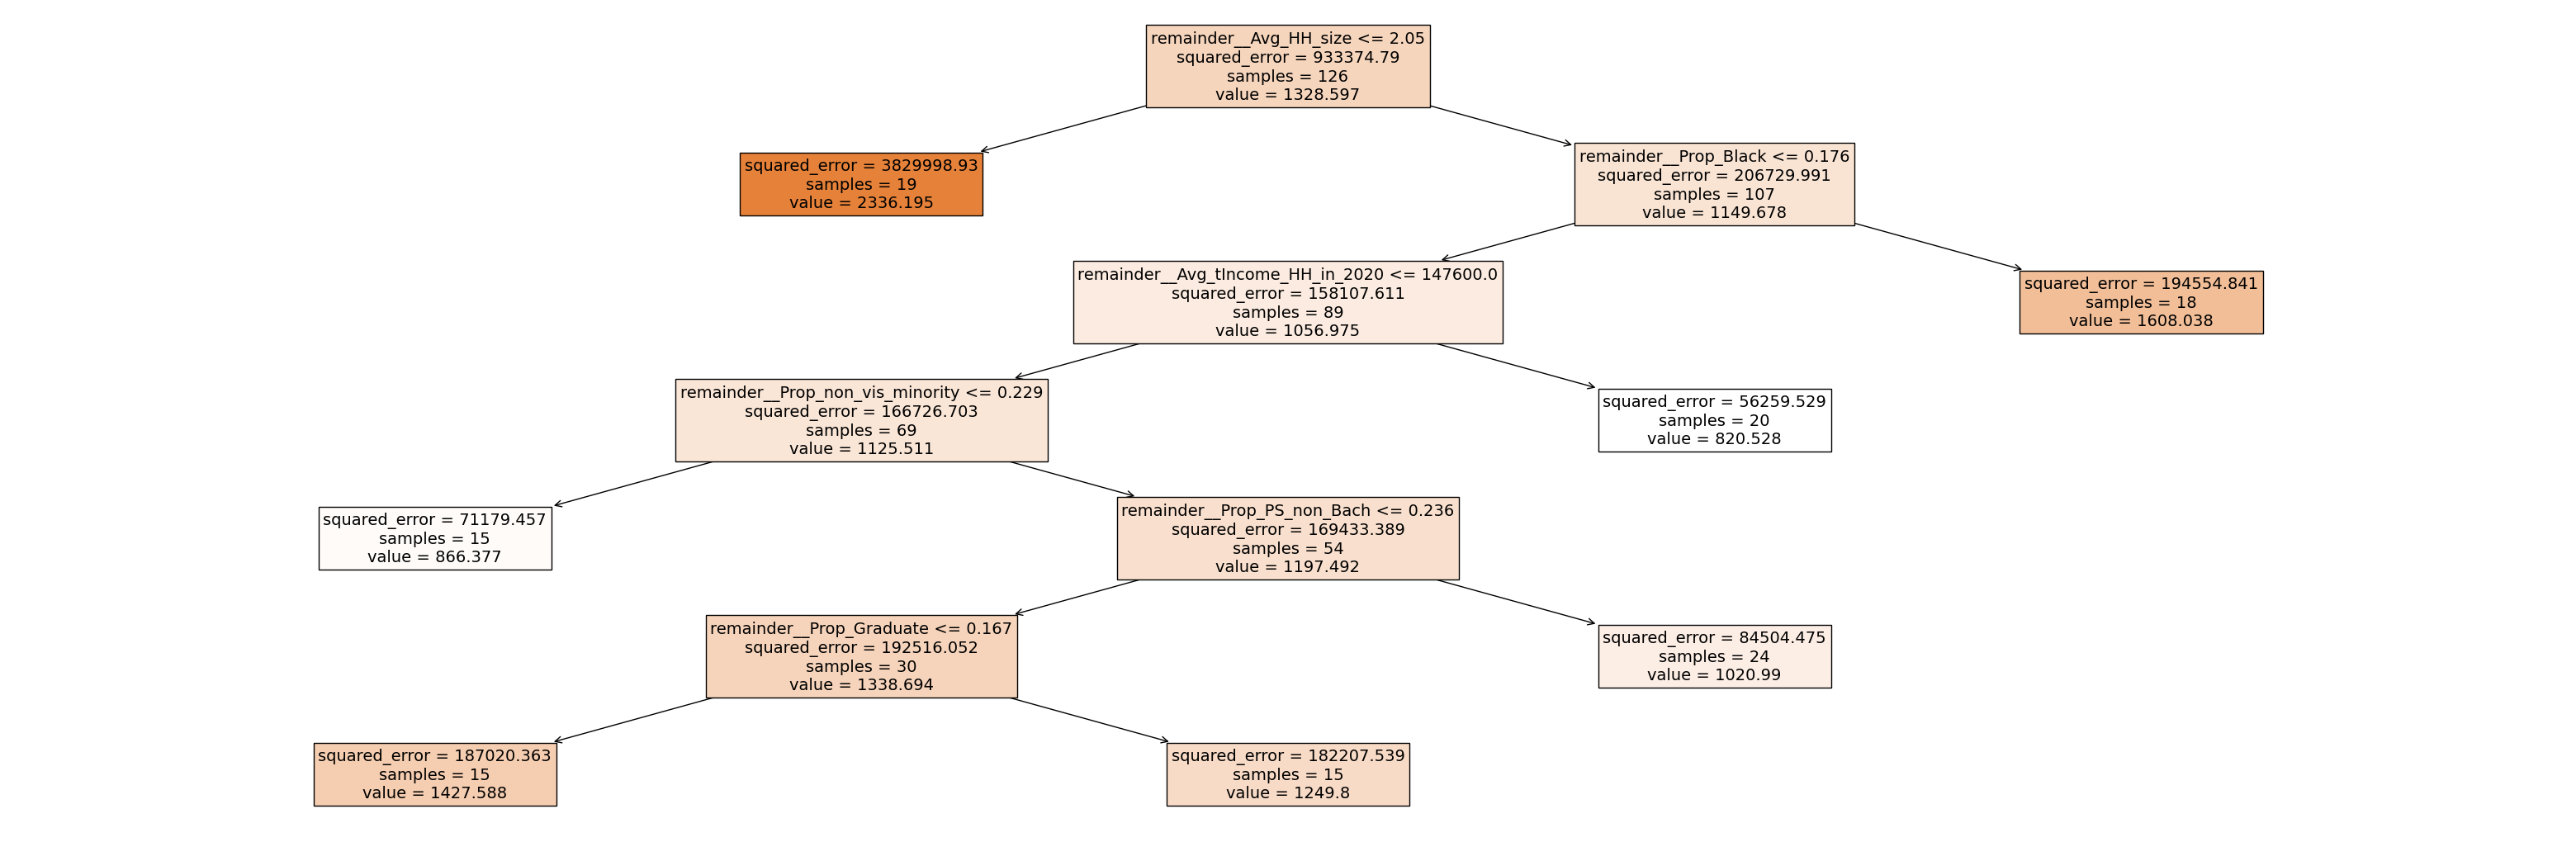

In [80]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_model = model.named_steps['DT']

#tree_structure = tree_model2.tree_
#n_nodes = tree_structure.node_count
#children_left = tree_structure.children_left
#children_right = tree_structure.children_right
#feature = tree_structure.feature
#threshold = tree_structure.threshold

#for node in range(n_nodes):
#    if children_left[node] != children_right[node]:  # Check if it's a non-leaf node
#        print(f"Node {node}: Split on feature {feature[node]}, threshold {threshold[node]}")
#    else:  # It's a leaf node
#        print(f"Node {node}: Leaf node")
        
feature_names = ct.get_feature_names_out()

# Plot the XG_Boost Tree
plt.figure(figsize=(40, 13))
plot_tree(tree_model, filled=True, feature_names=feature_names, fontsize=14)

plt.savefig("Decision_tree_plot.jpg", format="jpg")

In [84]:
#### RUN A RANDOM-FORREST MODEL 
# One of the significant advantages of Random Forest is its ability to handle large datasets with higher dimensionality 
# and its ability to estimate the importance of variables in the classification process.  Additionally, 
# it can handle missing values, outliers, and other non-linear data challenges quite well.


# Initializing the ColumnTransformer
# One-hot encoding is applied to all categorical columns except 'country'
# Target encoding is applied specifically to the 'country' column

ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(),[c for c in categorical_columns])],
    remainder='passthrough'
)


In [85]:
# Initializing the Gradient Boosting Classifier with specified parameters
random_forest = RandomForestRegressor(criterion='squared_error', oob_score=True)
#Criterion can be Poisson. 

# Creating a Pipeline:
# First, the data goes through the specified column transformations (ct)
# Then, the transformed data is used to train or predict using the Gradient Boosting model
model2 = Pipeline([
    ('pre_process', ct),        # Pre-processing step: Applying column transformations
    ('random_forest', random_forest) # Training/prediction step: Using random forest
])


In [86]:
# Training the Gradient Boosting model on the training dataset
model2 = model2.fit(train.drop('TOTAL_CRIME_RATE_2016', axis=1), train['TOTAL_CRIME_RATE_2016'])


In [149]:
### Fitting the initial bad classifier 

# Splitting the data4 into 70% training and 30% testing
#train = data_F.sample(frac=0.7, random_state=100)
#test = data_F.drop(train.index) 


# Predicting on the training dataset and computing the accuracy
Y_pred = model2.predict(train.drop('TOTAL_CRIME_RATE_2016', axis=1))
r2_score(train['TOTAL_CRIME_RATE_2016'], Y_pred)

0.5532514829646438

In [150]:
# Predicting on the test dataset and computing the accuracy
Y_pred = model2.predict(test.drop('TOTAL_CRIME_RATE_2016', axis=1))
r2_score(test['TOTAL_CRIME_RATE_2016'], Y_pred)

-0.2786289387011913

In [102]:
#### 

In [152]:
# Defining the hyperparameters to be tuned using GridSearchCV

param_dist = {
    "random_forest__n_estimators" : [5, 10, 15, 30, 50],
    "random_forest__max_depth" : [2, 3, 5],
    "random_forest__min_samples_leaf" : [2,3,5],
    "random_forest__max_features" : ['sqrt','log2']
}


# Using StratifiedKFold for cross-validation, ensuring each fold has the same proportion of observations with each target value
#skf = StratifiedKFold(n_splits=5)

# Setting up the GridSearchCV to find the best hyperparameters for the Gradient Boosting model
random_search = GridSearchCV(
    model2, param_grid=param_dist, cv=5
)

# Fitting the GridSearchCV on the training data
random_search.fit(train.drop('TOTAL_CRIME_RATE_2016', axis=1), train['TOTAL_CRIME_RATE_2016'])

# Storing and displaying the results of the grid search
results = pd.DataFrame(random_search.cv_results_)
results[results['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__max_features,param_random_forest__min_samples_leaf,param_random_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
56,0.006051,0.00018,0.000807,0.000101,3,log2,5,10,"{'random_forest__max_depth': 3, 'random_forest...",0.056286,0.250915,0.142344,0.10542,-0.248379,0.061317,0.167568,1


In [153]:
random_search.best_params_

{'random_forest__max_depth': 3,
 'random_forest__max_features': 'log2',
 'random_forest__min_samples_leaf': 5,
 'random_forest__n_estimators': 10}

In [187]:
# Updating the model's hyperparameters with the best parameters identified from the Grid Search.
model2 = model2.set_params(**random_search.best_params_)

# Retraining the model with the updated hyperparameters on the training data.
model2 = model2.fit(train.drop('TOTAL_CRIME_RATE_2016', axis=1), train['TOTAL_CRIME_RATE_2016'])

# Predicting the target variable on the training set and evaluating the model's accuracy.
Y_pred = model2.predict(train.drop('TOTAL_CRIME_RATE_2016', axis=1))
r2_score(train['TOTAL_CRIME_RATE_2016'], Y_pred)

0.4611662105684269

In [188]:
# Predicting the target variable on the test set and evaluating the model's accuracy.
Y_pred = model2.predict(test.drop('TOTAL_CRIME_RATE_2016', axis=1))
r2_score(test['TOTAL_CRIME_RATE_2016'], Y_pred)

0.2120848307258627

In [189]:
####SHAP to explain 
import shap
from sklearn.pipeline import Pipeline

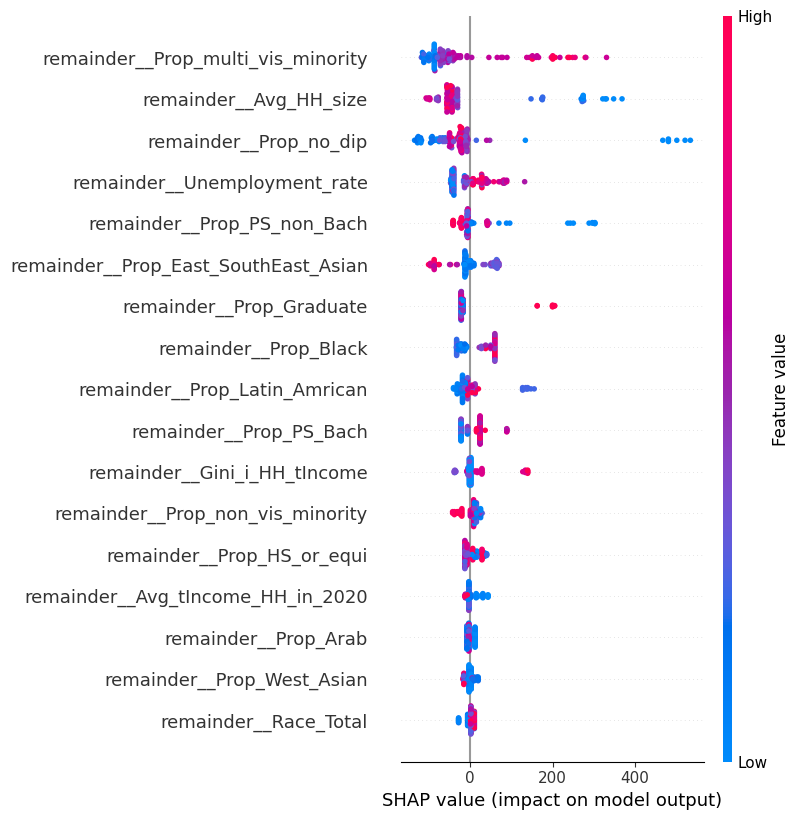

In [190]:
X_train = train.drop('TOTAL_CRIME_RATE_2016', axis=1)

feature_names = ct.get_feature_names_out()

explainer = shap.Explainer(model2.named_steps['random_forest'], check_additivity=False)
shap_values = explainer.shap_values(X_train,  check_additivity=False)

shap.summary_plot(shap_values, X_train, feature_names=feature_names)

In [ ]:
############ NLP SECTION ####################


In [254]:
# Import the pandas library and alias it as 'pd'
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Import the necessary libraries for data cleaning
import re  # Regular expressions library for text manipulation
#from datetime import datetime  # Library for handling dates and times

# Read the data from a CSV file named "covid_vaccine.csv" into a DataFrame
df = pd.read_csv("CSV_PAPERS.csv", encoding='ISO-8859-1')

# Select specific columns ('date', 'username', 'tweet', and 'Emotion') from the DataFrame
df = df[['Name', 'URL/Cite', 'Abstract', 'Methods']]

df['Methods'] = df['Methods'].astype(str)
df['Name'] = df['Name'].astype(str)
df['Abstract'] = df['Abstract'].astype(str)

# Display the first few rows (head) of the DataFrame to inspect the data
df.head()

,Name,URL/Cite,Abstract,Methods
0,"Socio-economic, built environment, and mobilit...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,"Nowadays, 23% of the world population lives in...",We also found some commonalities in all the ci...
1,Homicide rates are spatially associated with b...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9...,"""Objectives Homicide rate is associated with a...","In a first step, a literature search identifie..."
2,How the COVID-19 pandemic hit crime in Barcelo...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,Objectives: To compare the observed and foreca...,This study analyses whether the trend of daily...
3,Small area variation in crime effects of COVID...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9...,Purpose The aim of this study is to examine sm...,To examine localized instability in the lockdo...
4,Declines in Crime and Teen Childbearing: Ident...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Objectives The previous 25 years have witnesse...,Although total violent crime rates do not prov...


In [257]:
# Define a cleaning function that will replace the incorrectly encoded characters.
def clean_encoding(text):
    # Replace the incorrect character sequences with the correct character.
    # You can chain multiple replace calls to handle different cases.
    text = text.replace('¡¯', "'")  # Replace the sequence that represents a single quote
    # Add additional replacements here if there are other encoding issues
    return text

# Apply the cleaning function to the 'tweet' column of the DataFrame.
df['Abstract'] = df['Abstract'].apply(clean_encoding)
df['Methods'] = df['Methods'].apply(clean_encoding)
df.head()

,Name,URL/Cite,Abstract,Methods,Methods_expanded
0,"Socio-economic, built environment, and mobilit...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,"Nowadays, 23% of the world population lives in...",We also found some commonalities in all the ci...,We also found some commonalities in all the ci...
1,Homicide rates are spatially associated with b...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9...,"""Objectives Homicide rate is associated with a...","In a first step, a literature search identifie...","In a first step, a literature search identifie..."
2,How the COVID-19 pandemic hit crime in Barcelo...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,Objectives: To compare the observed and foreca...,This study analyses whether the trend of daily...,This study analyses whether the trend of daily...
3,Small area variation in crime effects of COVID...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9...,Purpose The aim of this study is to examine sm...,To examine localized instability in the lockdo...,To examine localized instability in the lockdo...
4,Declines in Crime and Teen Childbearing: Ident...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Objectives The previous 25 years have witnesse...,Although total violent crime rates do not prov...,Although total violent crime rates do not prov...


In [258]:
import contractions

# Expand contractions in the 'tweet' column
df['Methods_expanded'] = df['Methods'].apply(lambda x: contractions.fix(x))
df.head()

,Name,URL/Cite,Abstract,Methods,Methods_expanded
0,"Socio-economic, built environment, and mobilit...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,"Nowadays, 23% of the world population lives in...",We also found some commonalities in all the ci...,We also found some commonalities in all the ci...
1,Homicide rates are spatially associated with b...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9...,"""Objectives Homicide rate is associated with a...","In a first step, a literature search identifie...","In a first step, a literature search identifie..."
2,How the COVID-19 pandemic hit crime in Barcelo...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,Objectives: To compare the observed and foreca...,This study analyses whether the trend of daily...,This study analyses whether the trend of daily...
3,Small area variation in crime effects of COVID...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9...,Purpose The aim of this study is to examine sm...,To examine localized instability in the lockdo...,To examine localized instability in the lockdo...
4,Declines in Crime and Teen Childbearing: Ident...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Objectives The previous 25 years have witnesse...,Although total violent crime rates do not prov...,Although total violent crime rates do not prov...


In [264]:
# Function to remove URLs
def remove_url(text):
    return re.sub(r'http\S+', '', text)

def remove_special_characters(text):
    return re.sub(r'[^A-Za-z\s]', '', text)

# Need to remove numbers

# Need to remove things between parenthesis
def remove_between_parentheses(input_string):
    return re.sub(r'\([^)]*\)', '', input_string)

# Remove Numbers
def remove_numbers(input_string):
    return re.sub(r'\d+', '', input_string)


# 
df['Methods'] = df['Methods_expanded'].str.lower()
df['Methods'] = df['Methods'].apply(remove_url)
df['Methods'] = df['Methods'].apply(remove_special_characters)
df['Methods'] = df['Methods'].apply(remove_between_parentheses)
df['Methods'] = df['Methods'].apply(remove_numbers)

In [265]:
# instlal nltk

# !pip install nltk
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/benjaminzhang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [266]:
def tokenize_text(text):
   return word_tokenize(text)

df['tokens'] = df['Methods'].apply(tokenize_text)
df.head()

,Name,URL/Cite,Abstract,Methods,Methods_expanded,tokens,tokens_no_stop
0,"Socio-economic, built environment, and mobilit...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,"Nowadays, 23% of the world population lives in...",we also found some commonalities in all the ci...,We also found some commonalities in all the ci...,"[we, also, found, some, commonalities, in, all...","[also, found, commonalities, cities, find, cor..."
1,Homicide rates are spatially associated with b...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9...,"""Objectives Homicide rate is associated with a...",in a first step a literature search identified...,"In a first step, a literature search identifie...","[in, a, first, step, a, literature, search, id...","[first, step, literature, search, identified, ..."
2,How the COVID-19 pandemic hit crime in Barcelo...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,Objectives: To compare the observed and foreca...,this study analyses whether the trend of daily...,This study analyses whether the trend of daily...,"[this, study, analyses, whether, the, trend, o...","[study, analyses, whether, trend, daily, recor..."
3,Small area variation in crime effects of COVID...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9...,Purpose The aim of this study is to examine sm...,to examine localized instability in the lockdo...,To examine localized instability in the lockdo...,"[to, examine, localized, instability, in, the,...","[examine, localized, instability, lockdown, cr..."
4,Declines in Crime and Teen Childbearing: Ident...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Objectives The previous 25 years have witnesse...,although total violent crime rates do not prov...,Although total violent crime rates do not prov...,"[although, total, violent, crime, rates, do, n...","[although, total, violent, crime, rates, provi..."


In [267]:
#### Stop words (general)
# Import the 'stopwords' corpus from the Natural Language Toolkit (NLTK)
from nltk.corpus import stopwords

# Download the set of stopwords from NLTK. This is necessary the first time you run this code.
nltk.download('stopwords')

# Define a function that removes stop words from a list of tokens.
# Stop words are common words that are usually filtered out in NLP tasks.
def remove_stop_words(tokens):
    # Create a set of English stop words. Sets are faster for membership tests than lists.
    stop_words_set = set(stopwords.words('english'))
    
    # Return a new list that contains only the tokens that are not stop words.
    # The token is also converted to lowercase to ensure case-insensitive matching.
    return [token for token in tokens if token.lower() not in stop_words_set]

# Apply the 'remove_stop_words' function to the 'tokens' column of the dataframe 'df'.
# The result is a new column 'tokens_no_stop' in the dataframe 'df'.
df['tokens_no_stop'] = df['tokens'].apply(remove_stop_words)

# Display the first few rows of the DataFrame showing the 'tweet', 'tokens', and 'tokens_no_stop' columns.
# This gives a visual comparison between the original tokens and the tokens after stop words removal.
df[['Methods', 'tokens', 'tokens_no_stop']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/benjaminzhang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Methods,tokens,tokens_no_stop
0,we also found some commonalities in all the ci...,"[we, also, found, some, commonalities, in, all...","[also, found, commonalities, cities, find, cor..."
1,in a first step a literature search identified...,"[in, a, first, step, a, literature, search, id...","[first, step, literature, search, identified, ..."
2,this study analyses whether the trend of daily...,"[this, study, analyses, whether, the, trend, o...","[study, analyses, whether, trend, daily, recor..."
3,to examine localized instability in the lockdo...,"[to, examine, localized, instability, in, the,...","[examine, localized, instability, lockdown, cr..."
4,although total violent crime rates do not prov...,"[although, total, violent, crime, rates, do, n...","[although, total, violent, crime, rates, provi..."


In [327]:
#### Remove context-specific stopwords)


# Define additional context-sensitive stop words
context_sensitive_stop_words = set(["scale", "likert", "include", "value", "date", "record", "contain", "available", "complete","effect", "statistic", "type", "category", "report", "effect", "control", "u", "last", "category", "due", "item", "obtain", "select", "selected", "rate", "use", "block", "question", "study", "studies", "item", "unit", "one", "two", "calculate", "collection","dataset", "cluster", "research", "year", "high", "low", "indicate", "interview", "fig", "thus", "index", "percent", "create", "follow", "less", "mean","n", "group","block", "factor", "ie","census", "average", "per", "measure", "conducted","based", "predictor", "variables", "analysis", "number", "rate", "using", "et", "al", "used", "score", "participant","participants" "eg", "within", "case", "information", "variable", "neighborhood", "neighbourhood", "population", "sample", "data", "set", "base", "compare", "comparison", "find", "examine", "step", "analyses", "analyzes", "identify", "indicators", "indicator", "provide", "study", "search", "found", "first", "although", "total", "literature",'also',"purpose", "objectives", "introduction", "methods", "results", "analytical", "plan", "also", "community", "crime", "neighbourhood", "homicide", "robbery", "regression", "machine learning", "random forest", "neural", "network", "model" , "ZIP", "residence", "STATA", "Normality", "cross-level", "maximum", "Likelihood", "multi", "level", "poisson", "logistic", "linear", "forest", "random", "test", "chi-square"])

# English stop words
stop_words_set = set(stopwords.words('english'))

# Extend the previously defined function to remove both general and context-sensitive stop words
def remove_context_sensitive_stop_words(tokens):
    # Combine the general English stop words with the context-specific stop words
    # to create a comprehensive set of words to filter out.
    all_stop_words = stop_words_set | context_sensitive_stop_words
    return [token for token in tokens if token.lower() not in all_stop_words]

# Apply the updated function to remove both general and context-sensitive stop words
df['tokens_no_stop_context'] = df['tokens'].apply(remove_context_sensitive_stop_words)

# Display the DataFrame
df[['Methods', 'tokens', 'tokens_no_stop_context']].head()

,Methods,tokens,tokens_no_stop_context
0,we also found some commonalities in all the ci...,"[we, also, found, some, commonalities, in, all...","[commonalities, cities, corehoods, disadvantag..."
1,in a first step a literature search identified...,"[in, a, first, step, a, literature, search, id...","[identified, related, socioeconomic, character..."
2,this study analyses whether the trend of daily...,"[this, study, analyses, whether, the, trend, o...","[whether, trend, daily, recorded, catalonias, ..."
3,to examine localized instability in the lockdo...,"[to, examine, localized, instability, in, the,...","[localized, instability, lockdown, drop, make,..."
4,although total violent crime rates do not prov...,"[although, total, violent, crime, rates, do, n...","[violent, rates, exact, agespecific, birth, ra..."


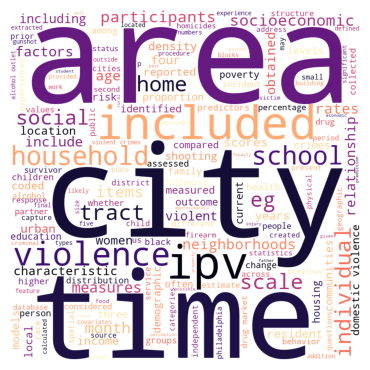

In [322]:
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt



# Combine all tokens from the 'tokens_no_stop_context' column into a single list
# Remove .head(5000) to generate the word cloud for the entire dataset
all_tokens = sum(df['tokens_no_stop_context'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image                        
plt.figure(figsize = (3.5, 3.5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [310]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Function to map NLTK position tags to WordNet tags
def get_wordnet_pos(word, pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens with POS tags
def lemmatize_tokens_with_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word, tag)) for word, tag in tagged_tokens]

# Apply this function to the 'tokens' column
df['lemmatized'] = df['tokens_no_stop_context'].apply(lemmatize_tokens_with_pos)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/benjaminzhang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/benjaminzhang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [317]:
df[['Methods', 'tokens', 'tokens_no_stop_context','lemmatized']].head()

,Methods,tokens,tokens_no_stop_context,lemmatized
0,we also found some commonalities in all the ci...,"[we, also, found, some, commonalities, in, all...","[commonalities, cities, corehoods, disadvantag...","[commonality, city, corehoods, disadvantage, e..."
1,in a first step a literature search identified...,"[in, a, first, step, a, literature, search, id...","[identified, related, socioeconomic, character...","[related, socioeconomic, characteristic, build..."
2,this study analyses whether the trend of daily...,"[this, study, analyses, whether, the, trend, o...","[whether, trend, daily, recorded, catalonias, ...","[whether, trend, daily, record, catalonias, po..."
3,to examine localized instability in the lockdo...,"[to, examine, localized, instability, in, the,...","[localized, instability, lockdown, drop, make,...","[localize, instability, lockdown, drop, make, ..."
4,although total violent crime rates do not prov...,"[although, total, violent, crime, rates, do, n...","[violent, rates, exact, agespecific, birth, ra...","[violent, exact, agespecific, birth, since, in..."


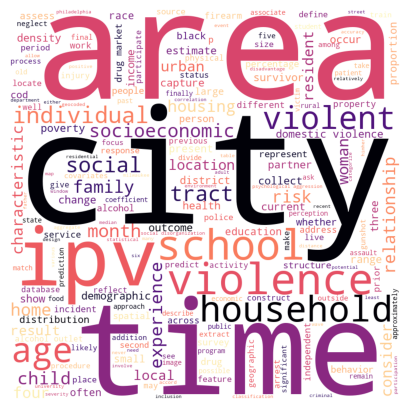

In [328]:
#re-remove context-specific stop words
df['lemmatized'] = df['lemmatized'].apply(remove_context_sensitive_stop_words)


from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tokens from the 'lemmatized' column into a single list
all_tokens = sum(df['lemmatized'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image                        
plt.figure(figsize = (3.9, 3.9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()